In [1]:
import pandas as pd
import numpy as np

In [14]:
train = pd.read_csv('./open data/train.csv', index_col=0)

In [6]:
train.shape

(45532, 78)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45532 entries, 0 to 45531
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       45532 non-null  int64  
 1   QaA         45532 non-null  float64
 2   QaE         45532 non-null  int64  
 3   QbA         45532 non-null  float64
 4   QbE         45532 non-null  int64  
 5   QcA         45532 non-null  float64
 6   QcE         45532 non-null  int64  
 7   QdA         45532 non-null  float64
 8   QdE         45532 non-null  int64  
 9   QeA         45532 non-null  float64
 10  QeE         45532 non-null  int64  
 11  QfA         45532 non-null  float64
 12  QfE         45532 non-null  int64  
 13  QgA         45532 non-null  float64
 14  QgE         45532 non-null  int64  
 15  QhA         45532 non-null  float64
 16  QhE         45532 non-null  int64  
 17  QiA         45532 non-null  float64
 18  QiE         45532 non-null  int64  
 19  QjA         45532 non-nul

In [15]:
train.head(20)

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,...,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,...,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,...,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,...,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,...,1,1,1,1,1,0,1,1,1,1
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,...,0,0,0,0,1,0,0,0,0,0
6,1.0,1382,1.0,1473,5.0,1479,4.0,2403,1.0,616,...,1,1,1,1,1,0,1,0,1,1
7,1.0,384,1.0,908,5.0,870,1.0,1059,1.0,1266,...,1,1,1,1,1,1,1,0,1,1
8,5.0,795,2.0,3469,4.0,1693,3.0,1991,4.0,5922,...,0,0,0,0,1,0,0,0,1,1


In [13]:
train['voted'].value_counts()

2    24898
1    20634
Name: voted, dtype: int64

In [12]:
train.isnull().sum()

index    0
QaA      0
QaE      0
QbA      0
QbE      0
        ..
wr_09    0
wr_10    0
wr_11    0
wr_12    0
wr_13    0
Length: 78, dtype: int64

In [9]:
import matplotlib.pyplot as plt
# matplotlib inline
import seaborn as sns
sns.set()

In [25]:
def bar_chart(feature):
    voted = train[train['voted']==1][feature].value_counts()
    not_voted = train[train['voted']==2][feature].value_counts()
    chart_df = pd.DataFrame([voted, not_voted])
    chart_df.index = ['voted', 'not_voted']
    chart_df.plot(kind='bar', stacked=True, figsize=(10, 5), rot=0)

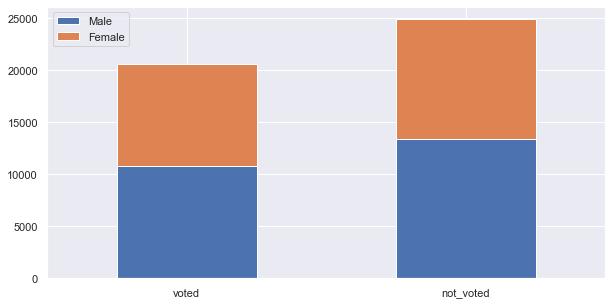

In [26]:
bar_chart('gender')

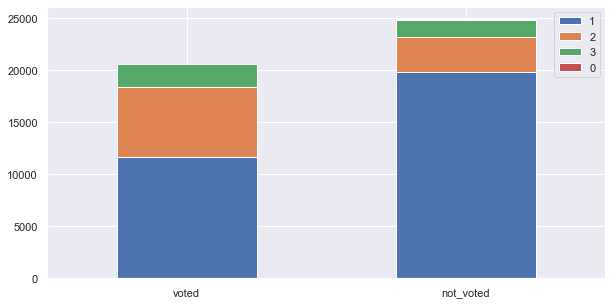

In [28]:
bar_chart('married')   # 의미가 있음 (1번 never married의 불투표율이 높다.)

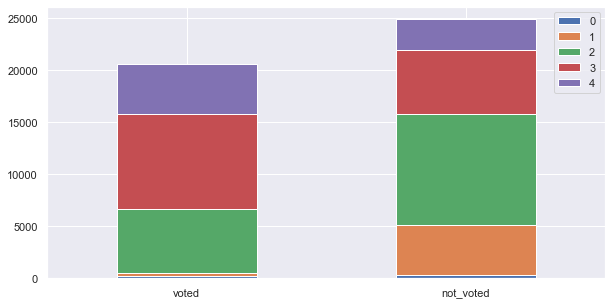

In [33]:
 bar_chart('education')   # 의미가 있음 (0번과 1번 저학력자의 불투표율이 높다.)

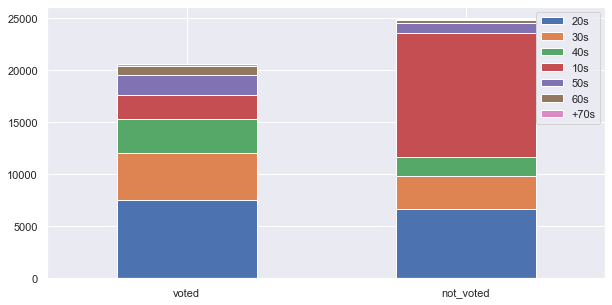

In [34]:
bar_chart('age_group')   # 유의미? 10대는 투표권 없나??

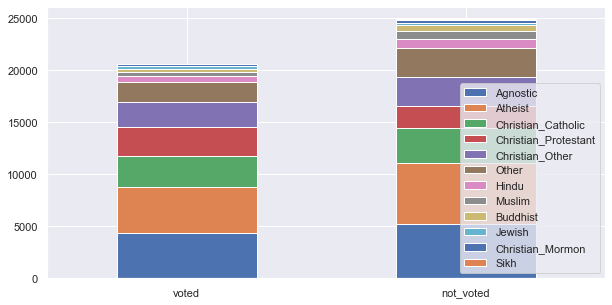

In [35]:
bar_chart('religion')  

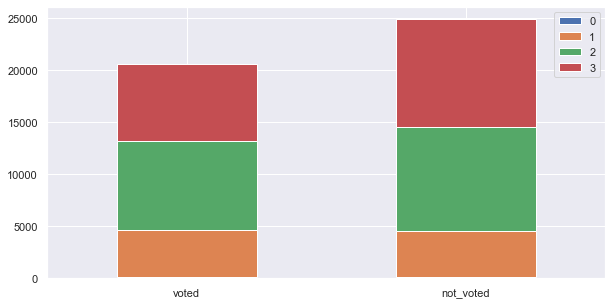

In [37]:
bar_chart('urban')  # 유의미 (유년기 거주구역이 3번 urban인 사람의 불투표율이 높다.)

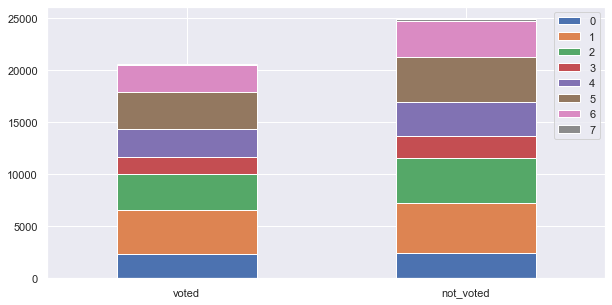

In [54]:
bar_chart('tp01')   # voted에서 7번 응답자는 없다.  다른 질문들도 마찬가지... 유의미

In [64]:
train_data = train[['married', 'education']]
target = train["voted"]
train_data.shape, target.shape

((45532, 2), (45532,))

# Modeling

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

### K-Fold Cross Validation

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=20, shuffle=True, random_state=0) 

### kNN

In [73]:
clf = KNeighborsClassifier(n_neighbors = 15)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
# kNN score
round(np.mean(score)*100, 2)

[0.66183575 0.65129556 0.62889767 0.62582345 0.67369346 0.61703996
 0.65700483 0.65261309 0.64646465 0.62977602 0.65349144 0.65480896
 0.61072056 0.64103691 0.66783831 0.66036907 0.53471002 0.65158172
 0.5254833  0.67530756]


63.6

### Decision Tree

In [68]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.66183575 0.68115942 0.65480896 0.67413263 0.67457181 0.65656566
 0.66534914 0.64822134 0.66842336 0.66842336 0.65963988 0.66666667
 0.64103691 0.66827768 0.66432337 0.66036907 0.66564148 0.67662566
 0.67047452 0.67311072]


66.5

### Random Forest

In [74]:
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.66227492 0.68115942 0.65524813 0.67413263 0.67457181 0.65656566
 0.66534914 0.64602547 0.66886254 0.66842336 0.66007905 0.66578832
 0.64499121 0.66827768 0.66432337 0.66036907 0.66564148 0.67662566
 0.67486819 0.67311072]


66.53

### Naive Bayes

In [75]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.63812033 0.63636364 0.61923584 0.63680281 0.62450593 0.5942029
 0.62187088 0.62011419 0.62274923 0.63065437 0.61616162 0.63987703
 0.6155536  0.62873462 0.65202109 0.62214411 0.62302285 0.63796134
 0.63181019 0.64411248]


62.78

### SVM

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)